In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
full=cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/sammy.jpg")
full=cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

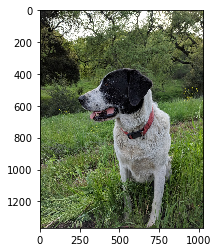

In [5]:
plt.imshow(full)

In [6]:
full.shape

(1367, 1025, 3)

# Template image
A subset of the image. Notehow iits actually the extract the image . Later on well discuss more advanced methods for the general matching. such as facial recognition

In [9]:
face=cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/sammy_face.jpg")
face=cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

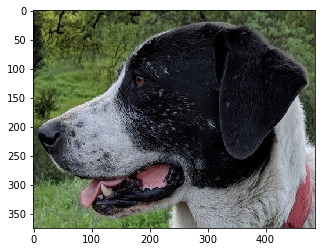

In [10]:
plt.imshow(face)

In [11]:
#eval() function in case you havent seen it before

In [12]:
sum([1,2,3])

6

In [13]:
mystring='sum'

In [14]:
mystring([1,2,3])

TypeError: 'str' object is not callable

In [15]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [ ]:
myfunc=eval(mystring)

In [18]:
myfunc([1,2,3])

6

In [20]:
height, width, channels= face.shape

In [21]:
height

375

In [22]:
width

486

In [23]:
#The full image to search
full=cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/sammy.jpg")
full=cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

#The template to match
face=cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/sammy_face.jpg")
face=cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


#all the 6 methods for comparison in a list
#note how  we are using straings , later on we'll use the eval():
#function to convert to function
methods=['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

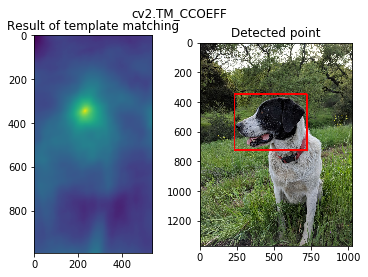

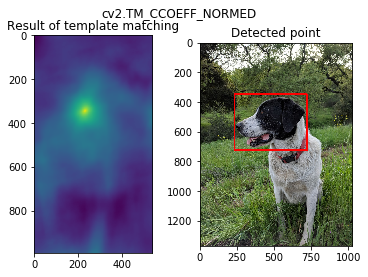

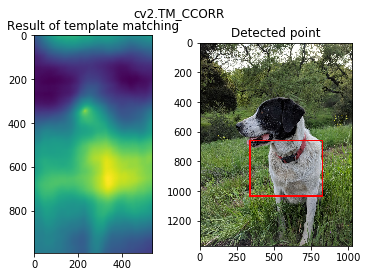

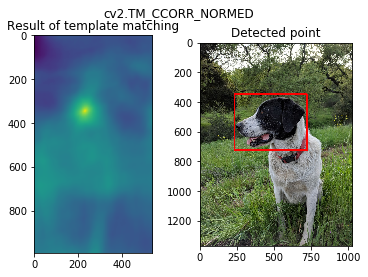

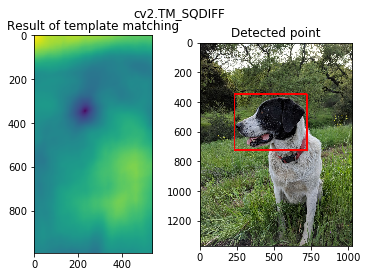

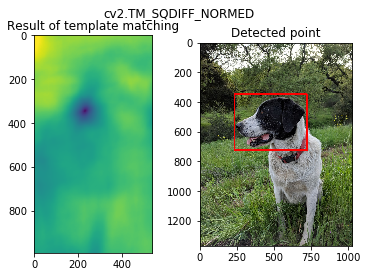

In [26]:
for m in methods:
    
    #Create the copy of image
    full_copy=full.copy()
    
    #get the actual function instead of the sttraing
    method=eval(m)
    
    #apply template matching with the methods
    res=cv2.matchTemplate(full_copy, face, method)
    
    #grab the max and min values , plus their location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    #set up drwaing of reactangle
    
    #if the methods is TM_SQDIFF or TM_SQDiFF_NORMED take minimum 
    #notice the coloring on the last 2 left hand side images
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left= min_loc
    else:
        top_left= max_loc
    
    #Assign the bottom right of the reactangel
    bottom_right= (top_left[0]+width, top_left[1]+height)
    
    #draw the red rectangle
    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)
    
    #plot the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    